In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Data preprocessing

# (a) import
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# loading data
df = pd.read_csv('disney_movie_total_gross.csv')

# Convert 'Date Released' column to datetime format
# First try parsing with dayfirst=True
df['Date Released'] = pd.to_datetime(df['Date Released'], dayfirst=True, errors='coerce')
# For rows that are still NaT, parse with dayfirst=False
df['Date Released'] = df['Date Released'].fillna(pd.to_datetime(df['Date Released'], dayfirst=False, errors='coerce'))


# Extract 'Year Released' and 'Month Released' for further analysis
df['Year Released'] = df['Date Released'].dt.year
df['Month Released'] = df['Date Released'].dt.month

# Replace 'Unknown' with NaN
df['MPAA Rating'] = df['MPAA Rating'].replace('Unknown', np.nan)
# Replace 0 values in 'Total Gross' and 'Inflation Adjusted Gross' with NaN
df['Total Gross'] = df['Total Gross'].replace(0, np.nan)
df['Inflation Adjusted Gross'] = df['Inflation Adjusted Gross'].replace(0, np.nan)
df


,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross,Year Released,Month Released
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09,1937,12
1,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09,1940,2
2,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09,1940,11
3,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09,1946,11
4,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08,1950,2
...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979.0,1.254598e+07,2016,9
575,Queen of Katwe,2016-09-23,Drama,PG,8874389.0,8.874389e+06,2016,9
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923.0,2.325329e+08,2016,11
577,Moana,2016-11-23,Adventure,PG,246082029.0,2.460820e+08,2016,11


# Basic data exploration and summary statistics

Test #1) Chi-Square Test (2-tailed test)
Testing to see if there is a relationship between MPAA Rating and Genre.

Null Hypothesis (H0): There is no association between MPAA Rating and Genre.
Alternative Hypothesis (H1): There is an association between MPAA Rating and Genre.

Chi-Square Statistic: 257.4729039822673
p-value: 1.9306975193535563e-30


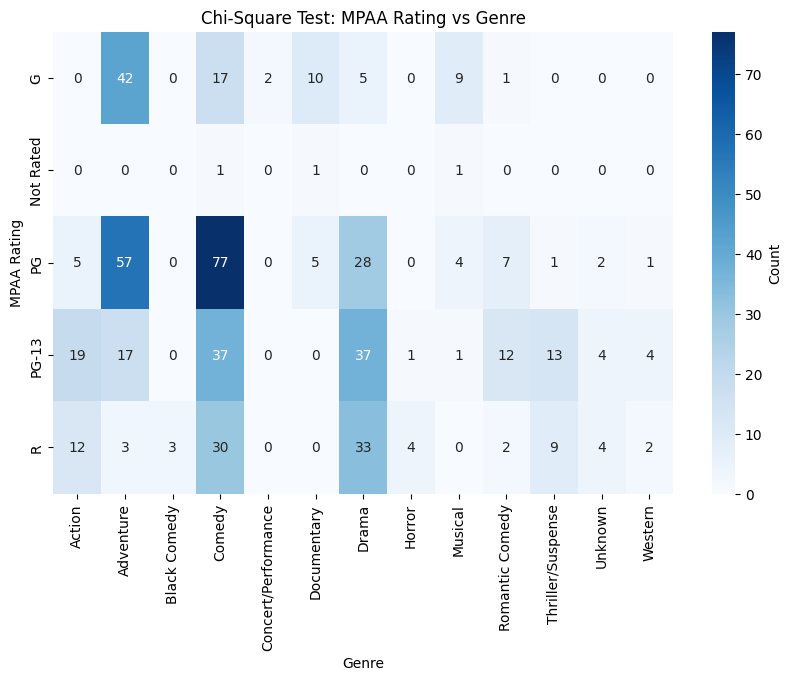

In [14]:
# Creating a contingency table
contingency_table = pd.crosstab(df['MPAA Rating'], df['Genre'])
# Performing Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

# Visualization: Heatmap for Chi-Square Test
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Chi-Square Test: MPAA Rating vs Genre')
plt.xlabel('Genre')
plt.ylabel('MPAA Rating')
plt.show()


Conclusion 1:


Test #2) ANOVA Test (2-tailed test)
Testing to see if the average Total Gross differs across different Genres.

Null Hypothesis (H0): The mean Total Gross is the same across all genres.
Alternative Hypothesis (H1): At least one genre has a different mean Total Gross.

F-Statistic: 9.726064078608891
p-value: 2.3697326998891643e-17


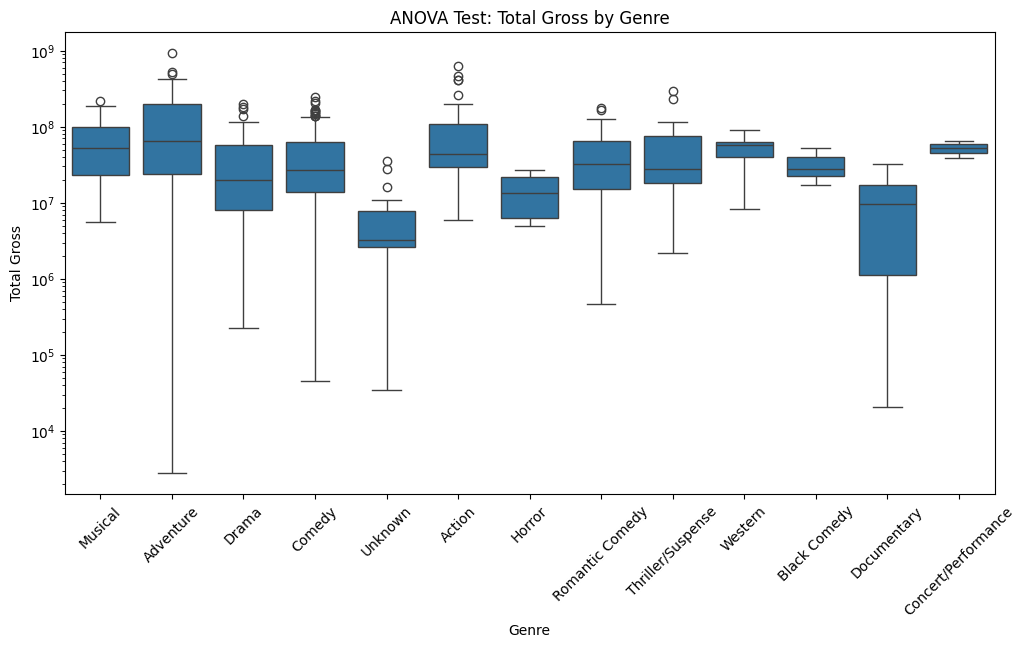

In [15]:
# Group by genre and extract the Total Gross for each genre
grouped_data = [group['Total Gross'].dropna() for name, group in df.groupby('Genre')]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

print(f'F-Statistic: {f_statistic}')
print(f'p-value: {p_value}')

# Visualization: Boxplot for ANOVA Test
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Total Gross', data=df)
plt.title('ANOVA Test: Total Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale for better visibility if necessary
plt.show()

Conclusion 2:

Test #3) t-test (1-tailed, 2-sample)
Testing to see if the average Total Gross for G rated movies is less than PG rated movies.

Null Hypothesis (H₀): The mean total gross for G-rated movies is less than or equal to that of PG-rated movies.
Alternative Hypothesis (H₁): The mean total gross for G-rated movies is greater than that of PG-rated movies.

T-Statistic (1-tailed): 1.5866757533445823
p-value (1-tailed): 0.05733890598249883


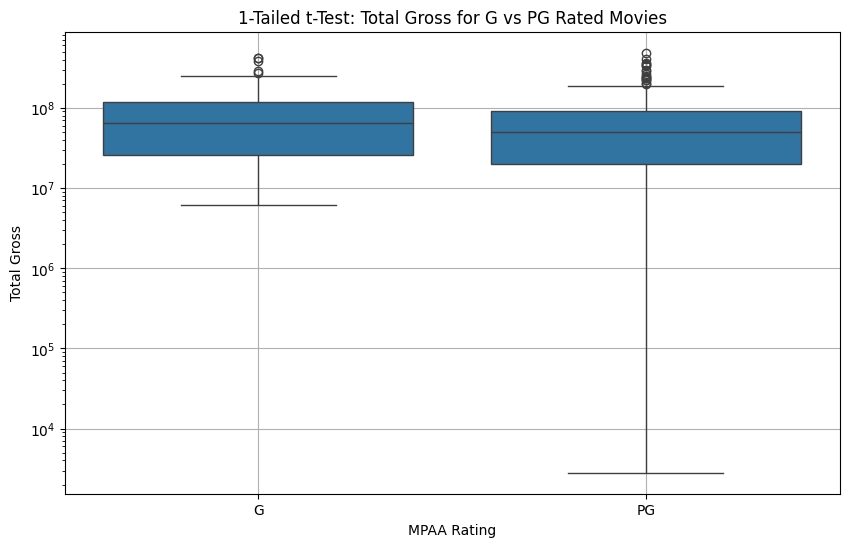

In [17]:
# Extract total gross for G and PG rated movies
g_rated = df[df['MPAA Rating'] == 'G']['Total Gross'].dropna()
pg_rated = df[df['MPAA Rating'] == 'PG']['Total Gross'].dropna()

# Perform t-test (1-tailed)
t_statistic, p_value_ttest = stats.ttest_ind(g_rated, pg_rated, equal_var=False)

# Since we're doing a 1-tailed test, halve the p-value
if t_statistic > 0:
    p_value_ttest /= 2
else:
    p_value_ttest = 1 - (p_value_ttest / 2)

print(f'T-Statistic (1-tailed): {t_statistic}')
print(f'p-value (1-tailed): {p_value_ttest}')

# Visualization: Boxplot for 1-tailed t-Test
plt.figure(figsize=(10, 6))
sns.boxplot(x='MPAA Rating', y='Total Gross', data=df[df['MPAA Rating'].isin(['G', 'PG'])])
plt.title('1-Tailed t-Test: Total Gross for G vs PG Rated Movies')
plt.xlabel('MPAA Rating')
plt.ylabel('Total Gross')
plt.yscale('log')  # Using log scale to handle wide range of values
plt.grid(True)
plt.show()


Conclusion 3:

